![](https://media.tenor.com/2465uJ1MAsMAAAAC/asleep-class.gif)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
import datetime as dt

`import dataset`

#  Dropping Rows with No CustomerID

# Indexing the Column By First Month of Visit

`when did each client buy for the first time?`

[Transform pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.transform.html)

# Grouping Data With CustomerIDs

`WHEN did each client continue buying?: how many months from the first purchase is each row?`

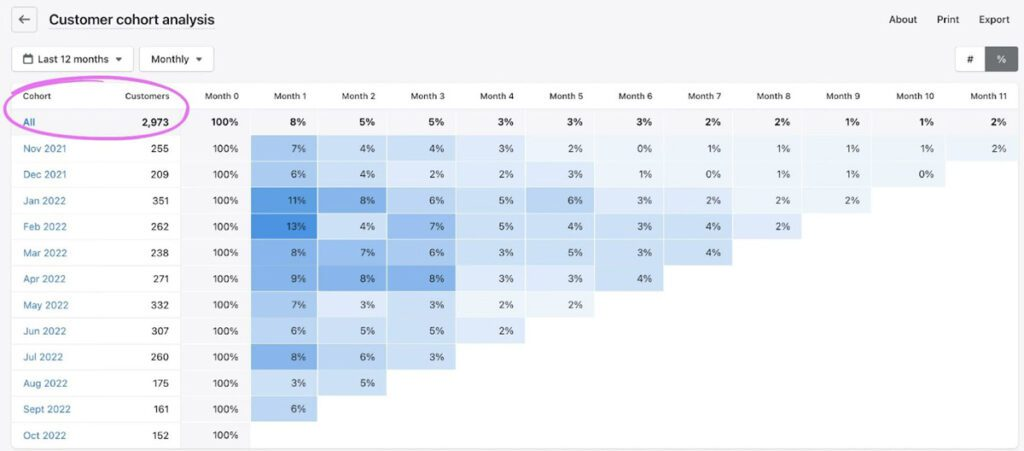

[pandas strftime](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.strftime.html)

# Creating a Pivot Table

# Creating the Heatmaps


`total amount`

`percentages`